In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to change default colormap
plt.rcParams["image.cmap"] = "Accent"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Accent.colors)

In [40]:
cpr_reordered_sktch_10k = pd.read_csv('./reordered_10k_fixed.csv',header = None, names=['size_byte','batch'], index_col='batch')
species_list = ["streptococcus_pneumoniae", "campylobacter_jejuni", "escherichia_coli", 'mycobacterium_tuberculosis','staphylococcus_aureus', 'salmonella_enterica']
original_sizes = [726682524, 241377816, 4301631272, 1282607124, 468444344, 4604082684]
no_genomes = [51433, 28336, 89136, 49020, 47997, 178585]
ref_sizes = [100,250,500,750,1000,2500,5000,7500,10000,12500,15000, 17500,20000]

In [41]:
cpr_reordered_sktch_10k.head(1000)

,size_byte
batch,
campylobacter_jejuni_placement_order_10000__00.tar.xz,21820444
campylobacter_jejuni_placement_order_10000__01.tar.xz,22692684
campylobacter_jejuni_placement_order_10000__02.tar.xz,21098488
campylobacter_jejuni_placement_order_10000__03.tar.xz,22090696
campylobacter_jejuni_placement_order_10000__04.tar.xz,43880224
...,...
salmonella_enterica_placement_order_5000__17.tar.xz,57316012
salmonella_enterica_placement_order_5000__18.tar.xz,132786348
salmonella_enterica_placement_order_5000__19.tar.xz,41686692


In [42]:
e_coli = cpr_reordered_sktch_10k[cpr_reordered_sktch_10k.index.str.contains('escherichia_coli_placement_order_20000', na=False)]

In [43]:
e_coli

,size_byte
batch,
escherichia_coli_placement_order_20000__00.tar.xz,44444996
escherichia_coli_placement_order_20000__01.tar.xz,184394104
escherichia_coli_placement_order_20000__02.tar.xz,263639428
escherichia_coli_placement_order_20000__03.tar.xz,162063812
escherichia_coli_placement_order_20000__04.tar.xz,204916572
escherichia_coli_placement_order_20000__05.tar.xz,210723452
escherichia_coli_placement_order_20000__06.tar.xz,143924364
escherichia_coli_placement_order_20000__07.tar.xz,104625652
escherichia_coli_placement_order_20000__08.tar.xz,161753292


In [47]:
def get_compression_results(species, ref_sizes):
    results = []
    for size in ref_sizes:
        mask = cpr_reordered_sktch_10k.index.str.contains(f"{species}_placement_order_{size}_", na=False)
        if mask.any():
            res_sum = cpr_reordered_sktch_10k.loc[mask, "size_byte"].sum()
        else:
            print(f"Missing data for {species}_placement_order_{size}")
            res_sum = np.nan   # gap in plot
        results.append(res_sum)
    return results

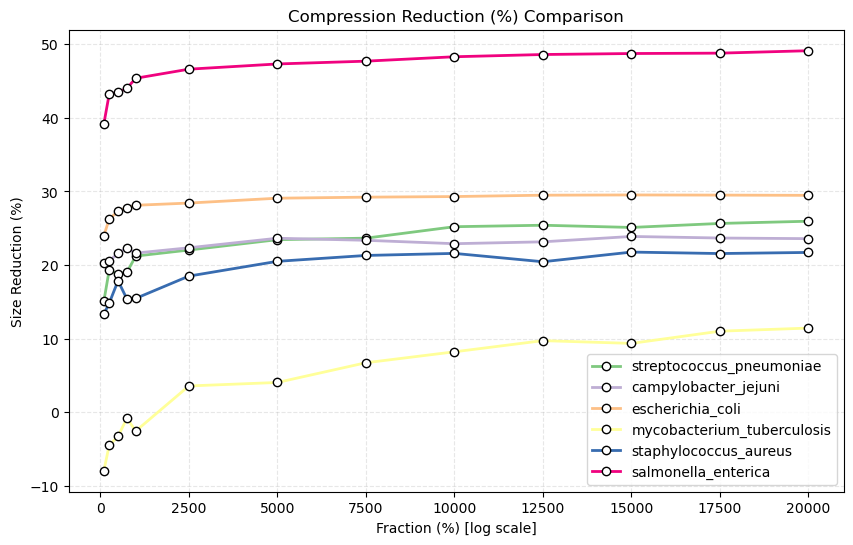

In [53]:
plt.figure(figsize=(10, 6))

for sp, orig_size in zip(species_list, original_sizes):
    results = get_compression_results(sp, ref_sizes)
    # Compute size reduction percentage
    reduction_pct = [100 * (orig_size - r) / orig_size if not np.isnan(r) else np.nan for r in results]
    plt.plot(ref_sizes, reduction_pct, label=sp, ls = '-', marker="o", linewidth=2, markersize=6, markeredgecolor="black",markerfacecolor="white")

plt.title("Compression Reduction (%) Comparison")
plt.xlabel("Fraction (%) [log scale]")
plt.ylabel("Size Reduction (%)")
plt.grid(True, which="both", ls="--", alpha = 0.3)
plt.legend()
plt.show()

In [46]:
get_compression_results('escherichia_coli', ref_sizes)

[9401721936,
 6251372760,
 6176676920,
 6151054216,
 6132461980,
 3078860836,
 3050403412,
 3044321848,
 3040798344,
 3032822552,
 3031401684,
 3032313216,
 3033672976]

In [ ]:
cpr_reordered_sktch_10k.index.str.contains(f"escherichia_coli_placement_order_100", na=False)